## Black Friday Sales Analysis
#### The dataset was obtained from an online data analytics competition. It comprises various features, including age, gender, marital status, product purchase categories, city demographics, and purchase amounts. With 12 columns and 537,577 records, our objective is to perform the analysis and find some key Insights.

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.read_csv("BlackFriday.csv")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [3]:
df=pd.read_csv("BlackFriday.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


### Null values are present in column 9 and 10

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

### Deleting those 2 columns as deleting the rowa will remove approx 60 percent of the data

In [6]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
for column in df.columns:
    print(column,":",df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


## Insights From Gender

In [9]:
df[df["Gender"]== "M"]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [10]:
data=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]),len(df[df["Gender"]=="F"])]},index=["Male","Female"])

In [11]:
data

,Ratio
Male,405380
Female,132197


<AxesSubplot:ylabel='Ratio'>

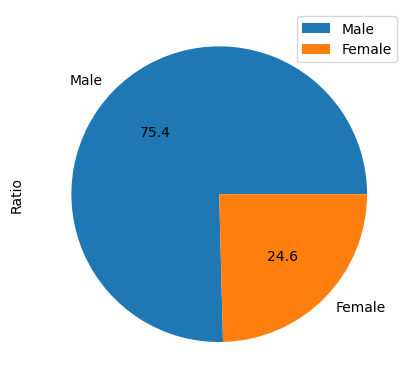

In [12]:
data.plot(kind="pie",y="Ratio",autopct="%.1f")

In [13]:
df.groupby("Gender").size()

Gender
F    132197
M    405380
dtype: int64

<AxesSubplot:xlabel='Gender'>

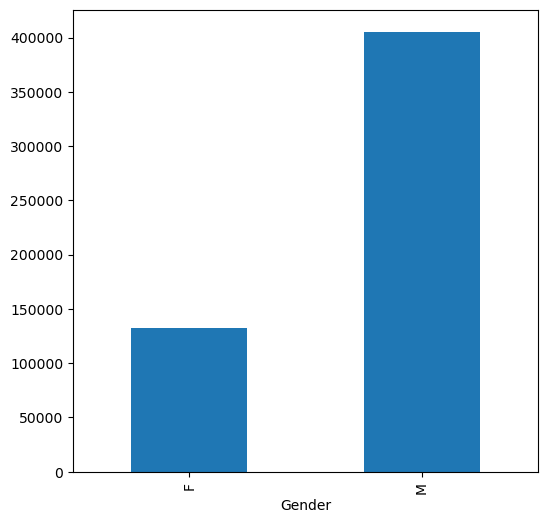

In [14]:
df.groupby("Gender").size().plot(kind="bar",figsize=(6,6))

### Amount spent by each gender

In [15]:
df.groupby("Gender").sum()["Purchase"]

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<AxesSubplot:ylabel='Purchase'>

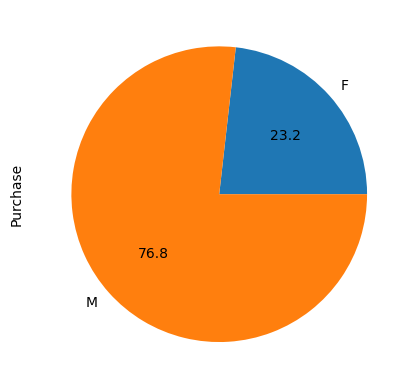

In [16]:
df.groupby("Gender").sum()["Purchase"].plot(kind="pie",y="Purchase",autopct="%.1f")


### Average amount spent by each gender


<AxesSubplot:ylabel='Purchase'>

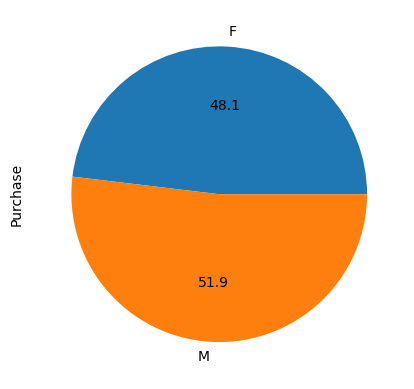

In [17]:
df.groupby("Gender").mean()["Purchase"].plot(kind="pie",y="Purchase",autopct="%.1f")

### Analyzing Age and Marital Affair

In [18]:
df.groupby("Age").size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<AxesSubplot:title={'center':'Purchase as per age'}, xlabel='Age'>

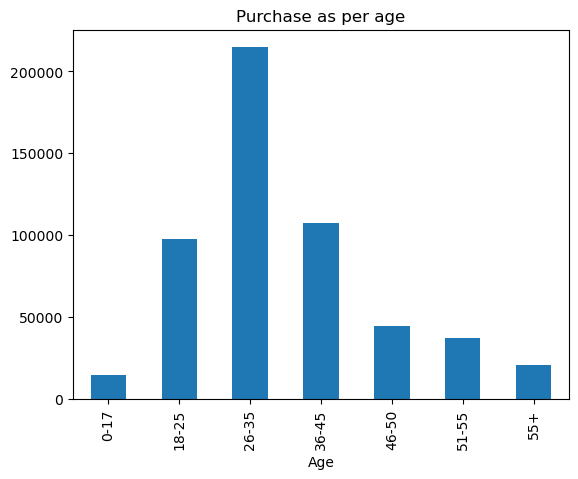

In [19]:
df.groupby("Age").size().plot(kind="bar",title="Purchase as per age")

### we can say that the buyers ranging from age 26-35 are most likely to buy a product during black friday sale

In [20]:
df.groupby("Age").nunique()["Product_ID"]

Age
0-17     2300
18-25    3213
26-35    3419
36-45    3318
46-50    3099
51-55    2877
55+      2573
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='Age'>

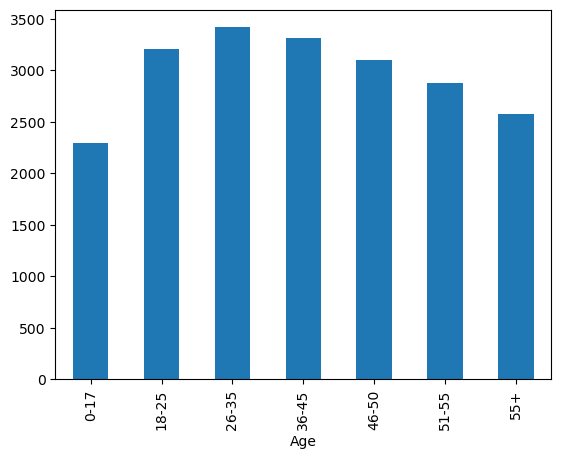

In [21]:
df.groupby("Age").nunique()["Product_ID"].plot.bar("Age")

In [22]:
df.groupby("Age").mean()["Purchase"]

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<AxesSubplot:ylabel='Purchase'>

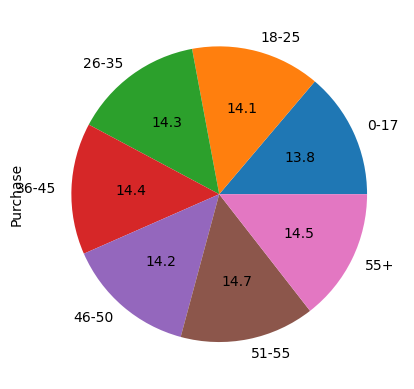

In [23]:
df.groupby("Age").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

<AxesSubplot:ylabel='None'>

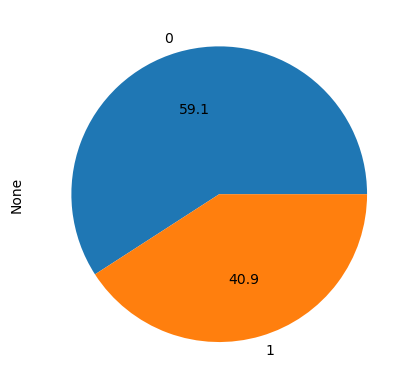

In [24]:
df.groupby("Marital_Status").size().plot(kind="pie",autopct="%.1f")

In [25]:
import seaborn as sns


<AxesSubplot:xlabel='Gender', ylabel='count'>

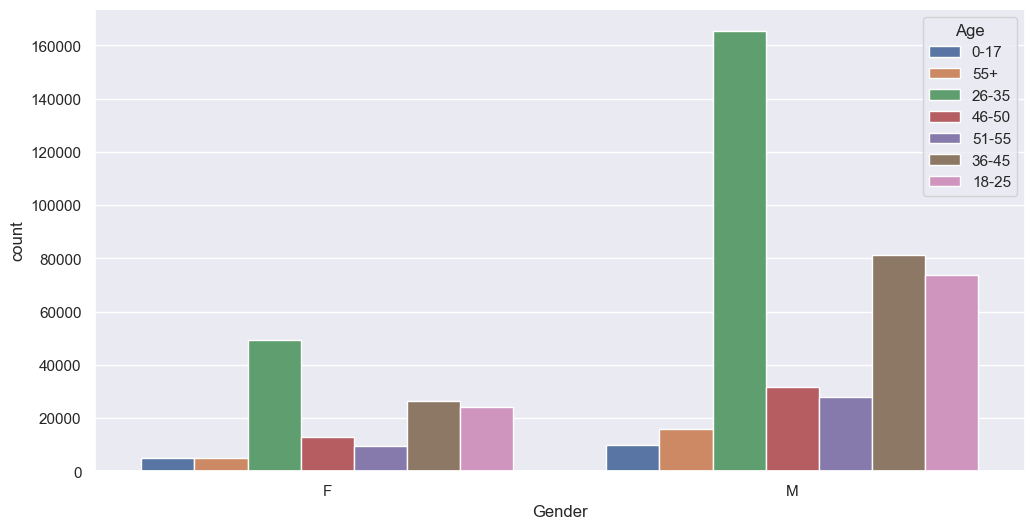

In [26]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(x="Gender",hue="Age",data=df)


<AxesSubplot:xlabel='Age', ylabel='count'>

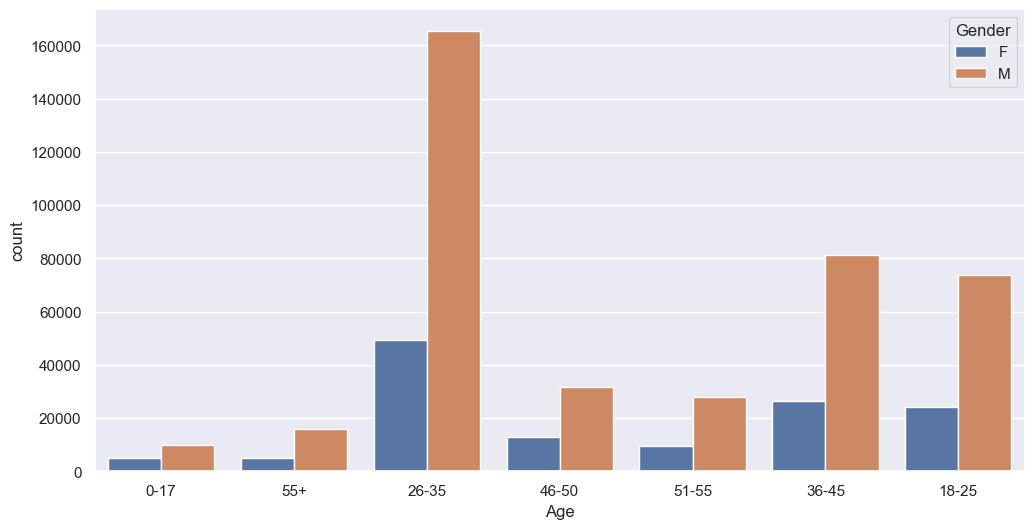

In [27]:
sns.countplot(x="Age",hue="Gender",data=df)

In [28]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:ylabel='None'>

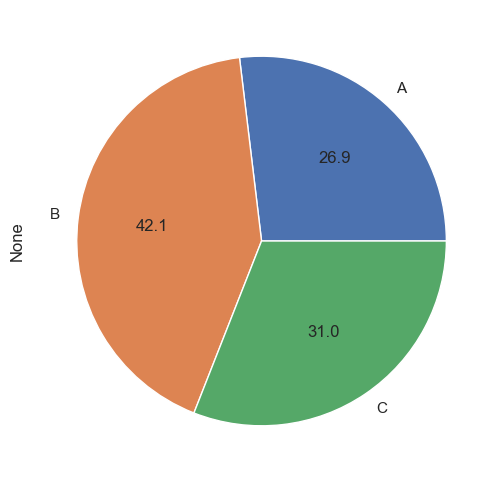

In [29]:
df.groupby("City_Category").size().plot(kind="pie",autopct="%.1f")

### We can see that 42% of the people buying in black friday sales are from city B

<AxesSubplot:xlabel='Gender', ylabel='count'>

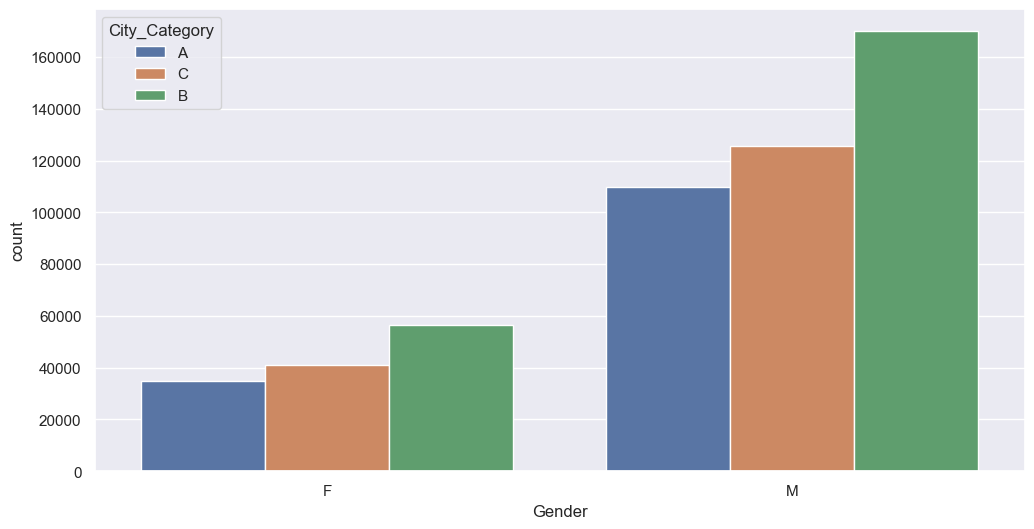

In [30]:
sns.countplot(x="Gender",hue="City_Category",data=df)

<AxesSubplot:ylabel='Purchase'>

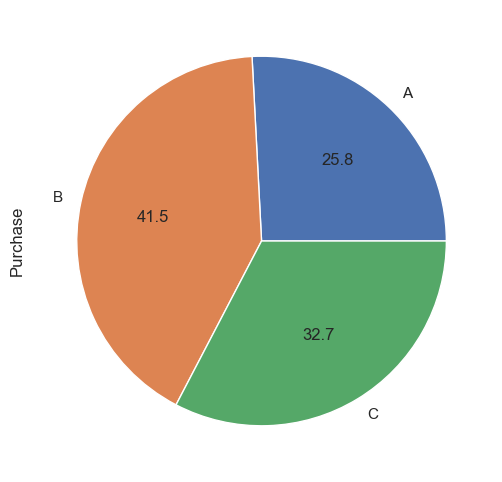

In [31]:
df.groupby("City_Category").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

<AxesSubplot:ylabel='Purchase'>

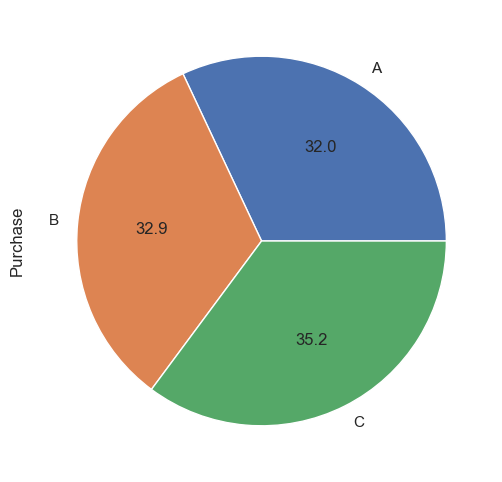

In [32]:
df.groupby("City_Category").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

### From the above two charts it can be observed that total amount spent is most in City B and least in City A but the average amount spent is approx same in both the city that concludes people in City A are buying more product but People in city A are buying expensive Products. The average cost spent is maximum for City C 

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

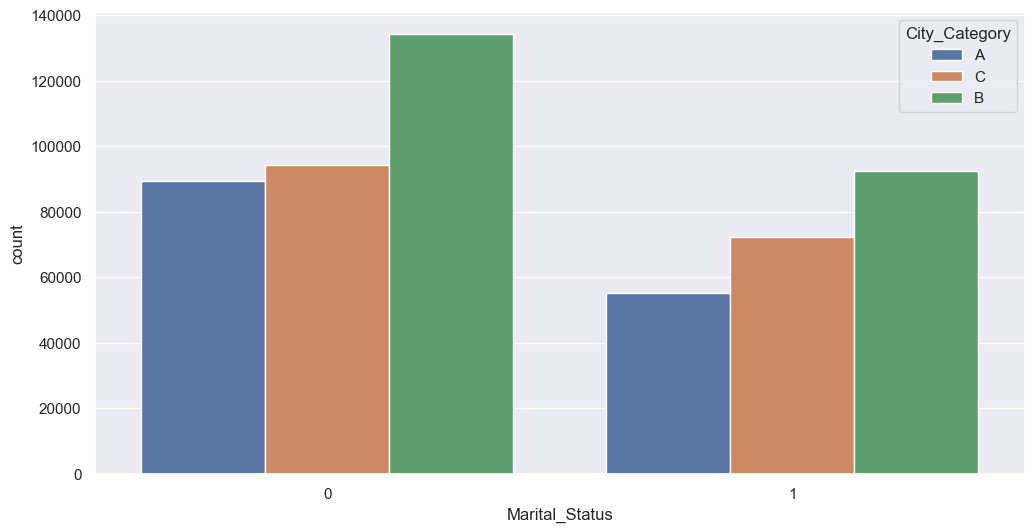

In [33]:
sns.countplot(x="Marital_Status",hue="City_Category",data=df)

<AxesSubplot:ylabel='Purchase'>

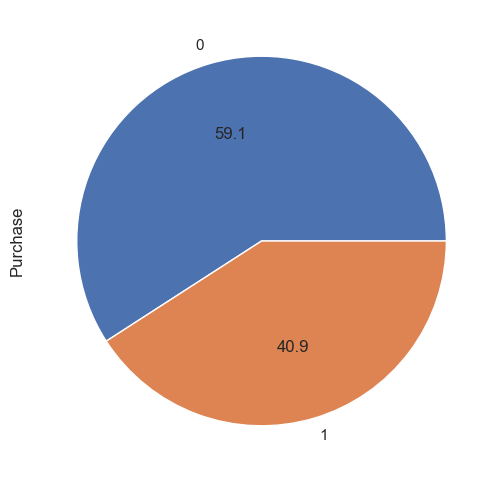

In [34]:
df.groupby("Marital_Status").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

<AxesSubplot:xlabel='City_Category', ylabel='count'>

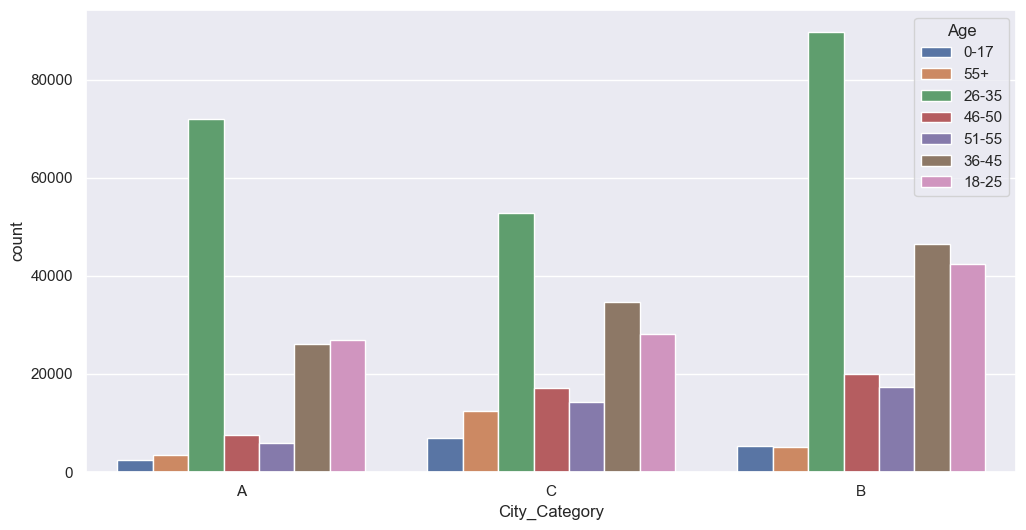

In [35]:
sns.countplot(x="City_Category",hue="Age",data=df)

### City A and C have approx same number of people in Age category 18-25 but city C has much more people in age category 36-45

In [36]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [37]:
df.groupby("Stay_In_Current_City_Years").size()

Stay_In_Current_City_Years
0      72725
1     189192
2      99459
3      93312
4+     82889
dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

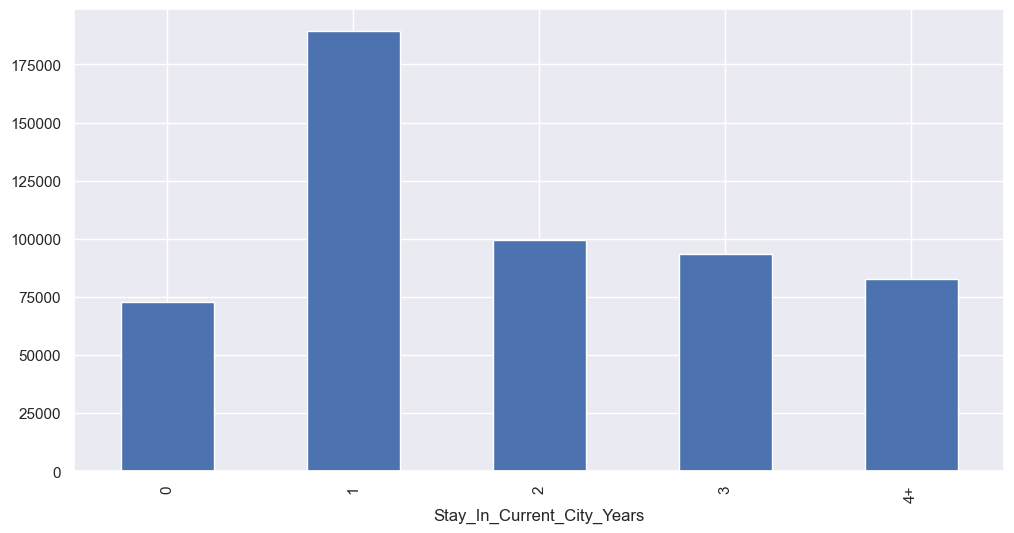

In [38]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind="bar")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

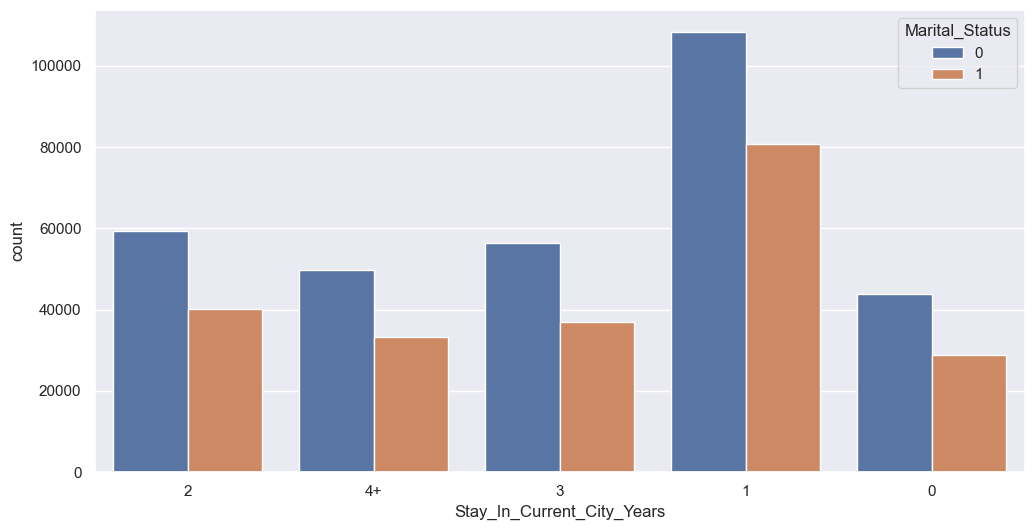

In [39]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Marital_Status",data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

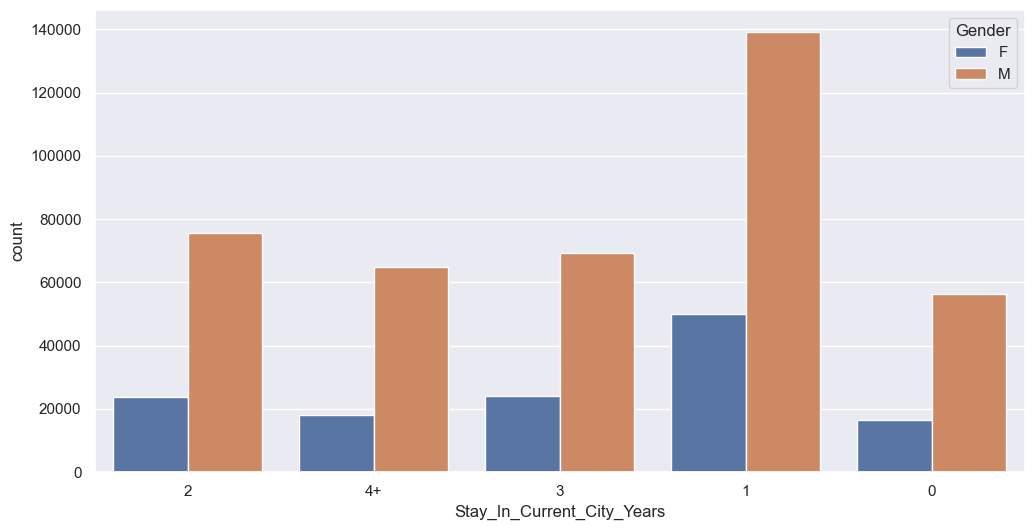

In [40]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Gender",data=df)

### From this we can say that targeting the Male who are unmarried and living in the city since an year are more likely to buy a product

In [41]:
# Checking the amount spent by Males who are unmarried and living in the city since an year

In [42]:
df_pr=df[df["Gender"]=="M"]

In [43]:
df_pr.groupby("Stay_In_Current_City_Years").sum()["Purchase"]

Stay_In_Current_City_Years
0      528630216
1     1321077096
2      725224330
3      663184060
4+     614928655
Name: Purchase, dtype: int64

<AxesSubplot:ylabel='Purchase'>

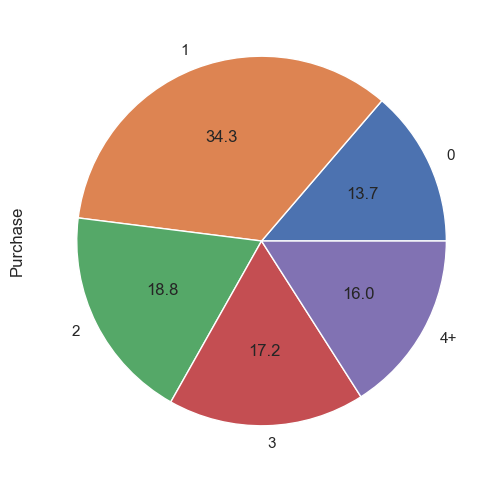

In [44]:
df_pr.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

<AxesSubplot:ylabel='Purchase'>

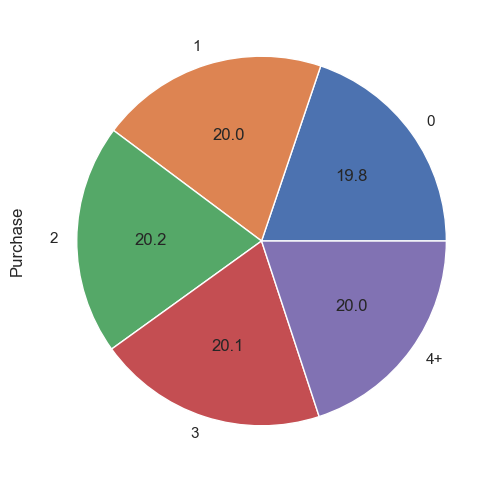

In [45]:
df_pr.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

### It can be seen that average price spent is same for the males irrespective of time spent in the city.

### Analysis on basis of Occupation

<AxesSubplot:xlabel='Occupation'>

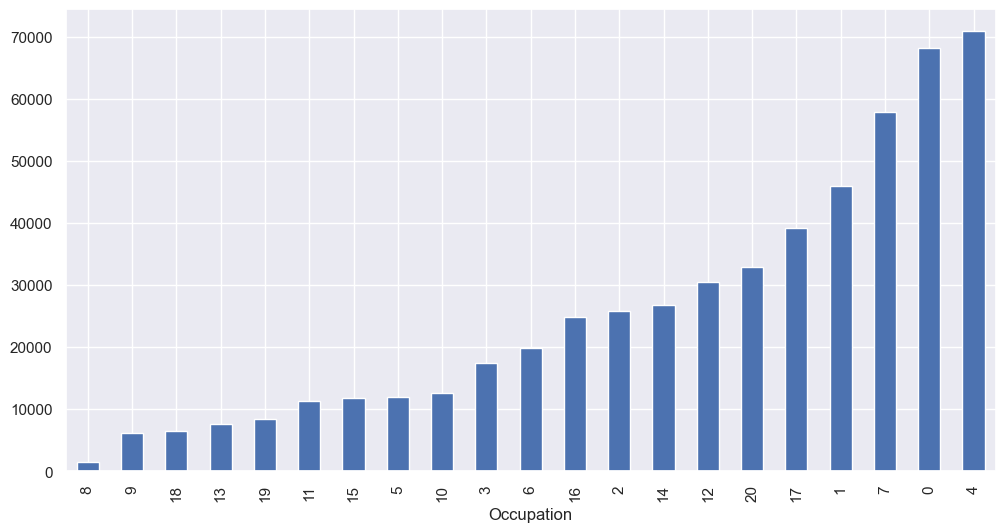

In [46]:
df.groupby("Occupation").size().sort_values(ascending=True).plot(kind="bar")

#### People with occupation 4 are buying the most number of products

<AxesSubplot:xlabel='Occupation'>

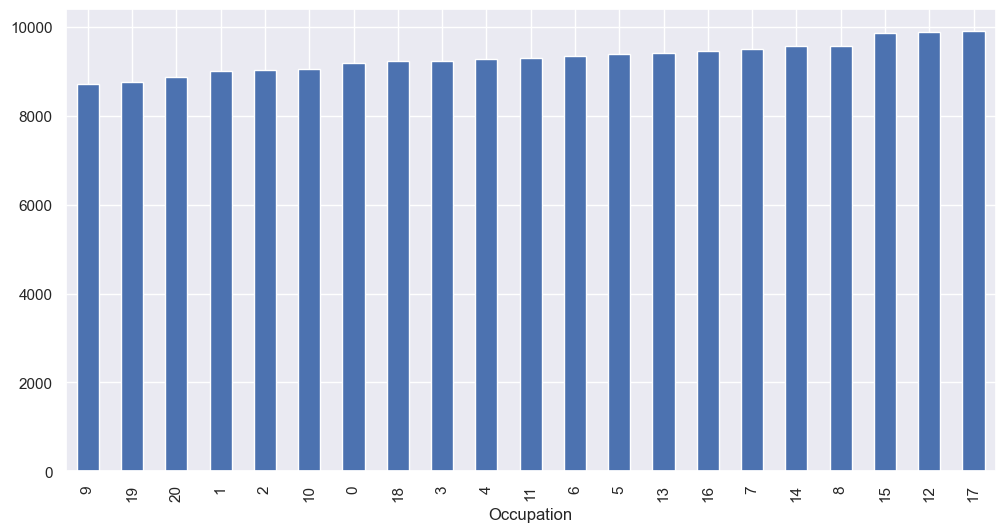

In [47]:
df.groupby("Occupation").mean()["Purchase"].sort_values(ascending=True).plot(kind="bar")

#### People with Occupation 17 are buying more expensive Products

<AxesSubplot:xlabel='Occupation', ylabel='count'>

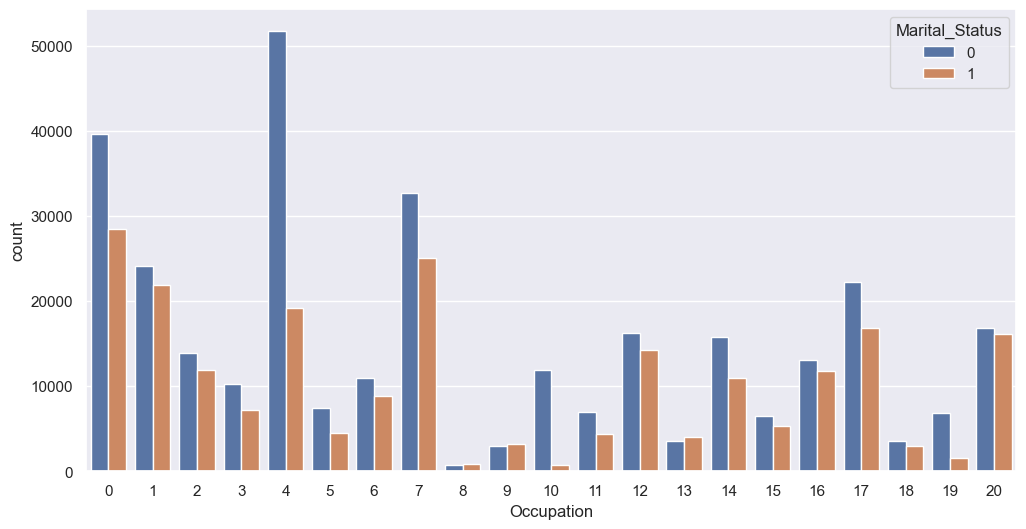

In [48]:
sns.countplot(x="Occupation",hue="Marital_Status",data=df)

#### In occupation 4 there are mostly unmaried people

In [49]:
df.groupby("Product_Category_1").size()

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
dtype: int64

<AxesSubplot:xlabel='Product_Category_1'>

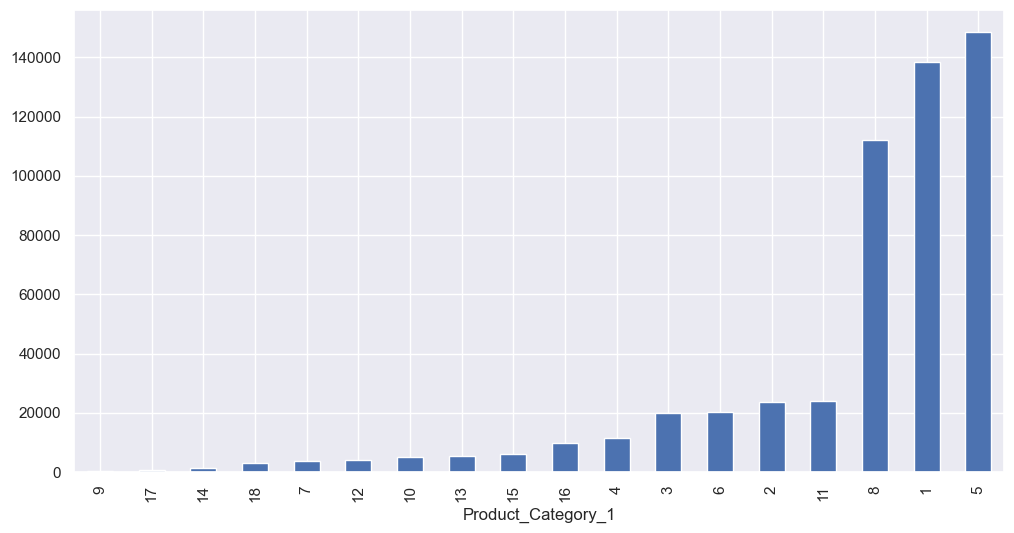

In [50]:
df.groupby("Product_Category_1").size().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_1'>

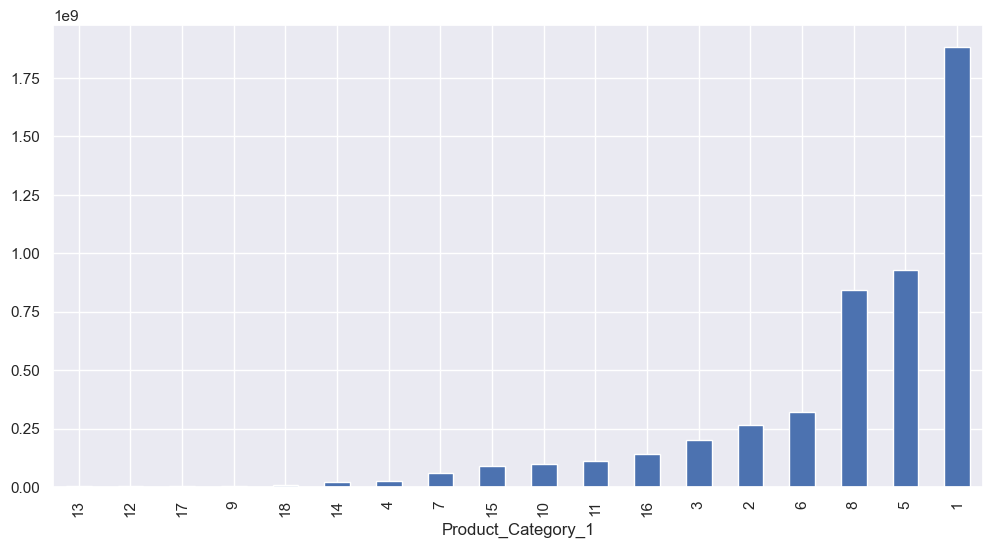

In [51]:
df.groupby("Product_Category_1").sum()["Purchase"].sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Product_ID'>

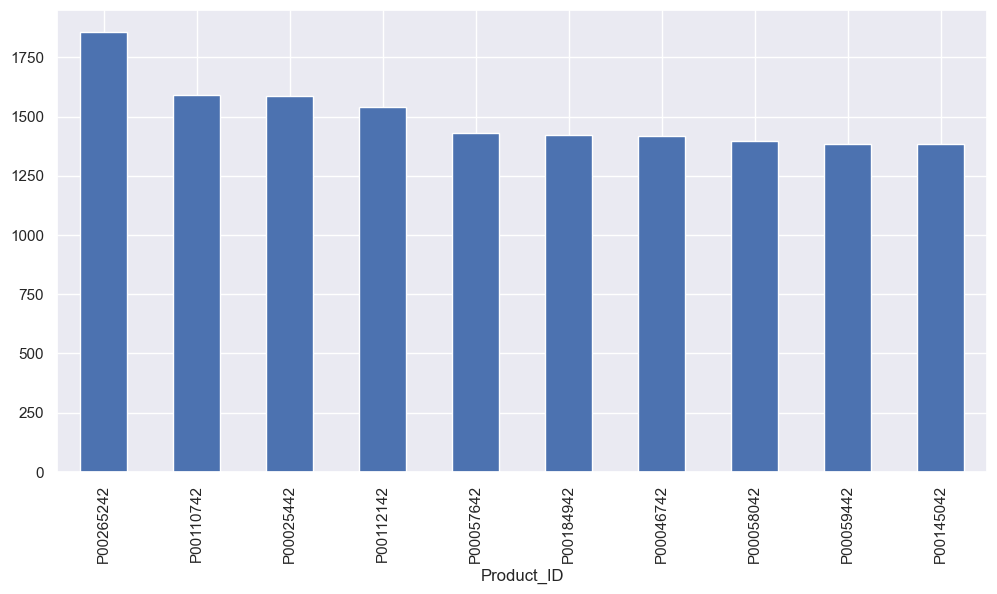

In [52]:
df.groupby("Product_ID").size().sort_values().nlargest(10).plot(kind="bar")

#### These are the top 10 hot selling products

<AxesSubplot:xlabel='Product_ID'>

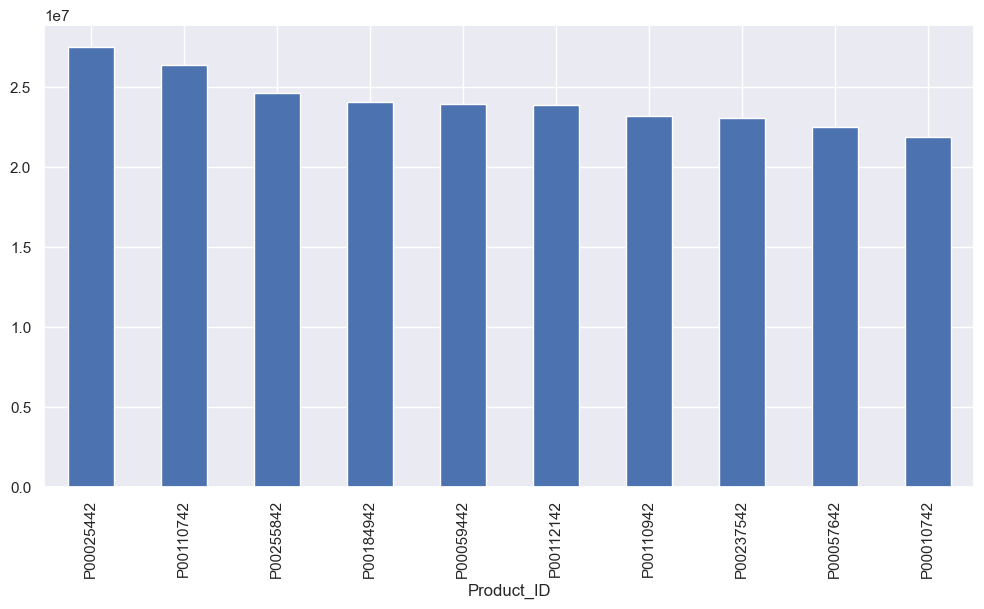

In [53]:
df.groupby("Product_ID").sum()["Purchase"].sort_values().nlargest(10).plot(kind="bar")

#### These are the top 10 products on which people are spending the most

<AxesSubplot:xlabel='Product_ID'>

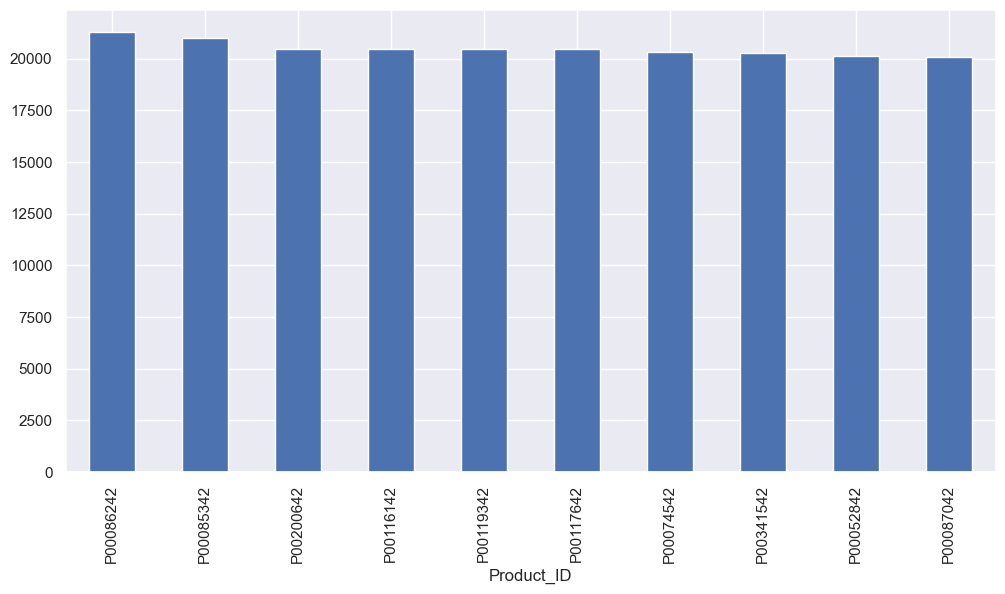

In [54]:
df.groupby("Product_ID").mean()["Purchase"].sort_values().nlargest(10).plot(kind="bar")

#### These are the most expensive products

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [56]:
l=[]
for i in range(len(df)):
    l.append(df["Gender"][i] + "_" + str(df["Marital_Status"][i]))
    
df["Gender_Marital"]=l
    

In [57]:
len(df)

537577

In [58]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_Marital
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='Gender_Marital', ylabel='count'>

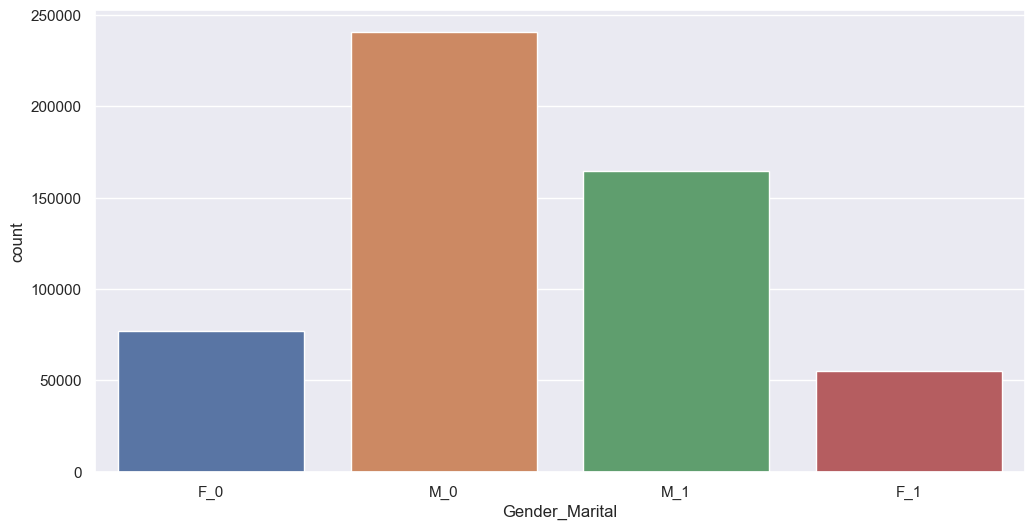

In [59]:
sns.countplot(x="Gender_Marital",data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

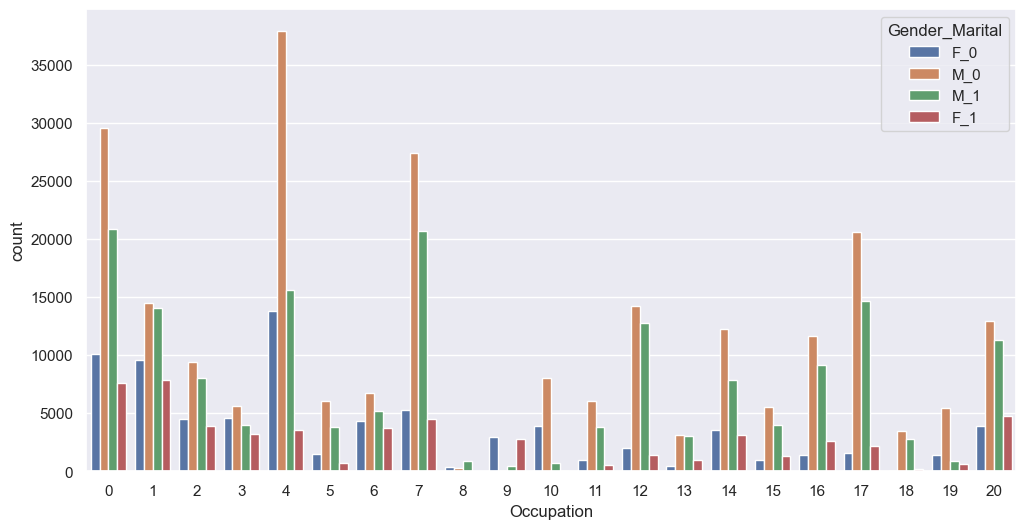

In [60]:
sns.countplot(x="Occupation",hue="Gender_Marital",data=df)

In [61]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_Marital
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


In [62]:
df[df["Age"]!="0-17"].query('Gender=="F" and Marital_Status==0 and Purchase>4000').sort_values(by="Purchase")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_Marital
412354,1003501,P00125742,F,36-45,7,C,1,0,8,4001,F_0
97699,1003151,P00002542,F,26-35,0,C,1,0,8,4001,F_0
266918,1005107,P00113342,F,46-50,0,B,0,0,1,4001,F_0
495084,1004223,P00037942,F,36-45,17,A,2,0,8,4001,F_0
165221,1001516,P00297042,F,26-35,12,B,1,0,8,4001,F_0
...,...,...,...,...,...,...,...,...,...,...,...
292687,1003151,P00087042,F,26-35,0,C,1,0,10,23930,F_0
88905,1001688,P00159542,F,18-25,4,C,4+,0,10,23932,F_0
36993,1005693,P00119342,F,26-35,4,B,1,0,10,23938,F_0
342015,1004610,P00052842,F,26-35,4,B,1,0,10,23950,F_0


In [63]:
df_pr=df[((df.Gender=='F') & (df.Marital_Status==0) & (df.Purchase>4000))]

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

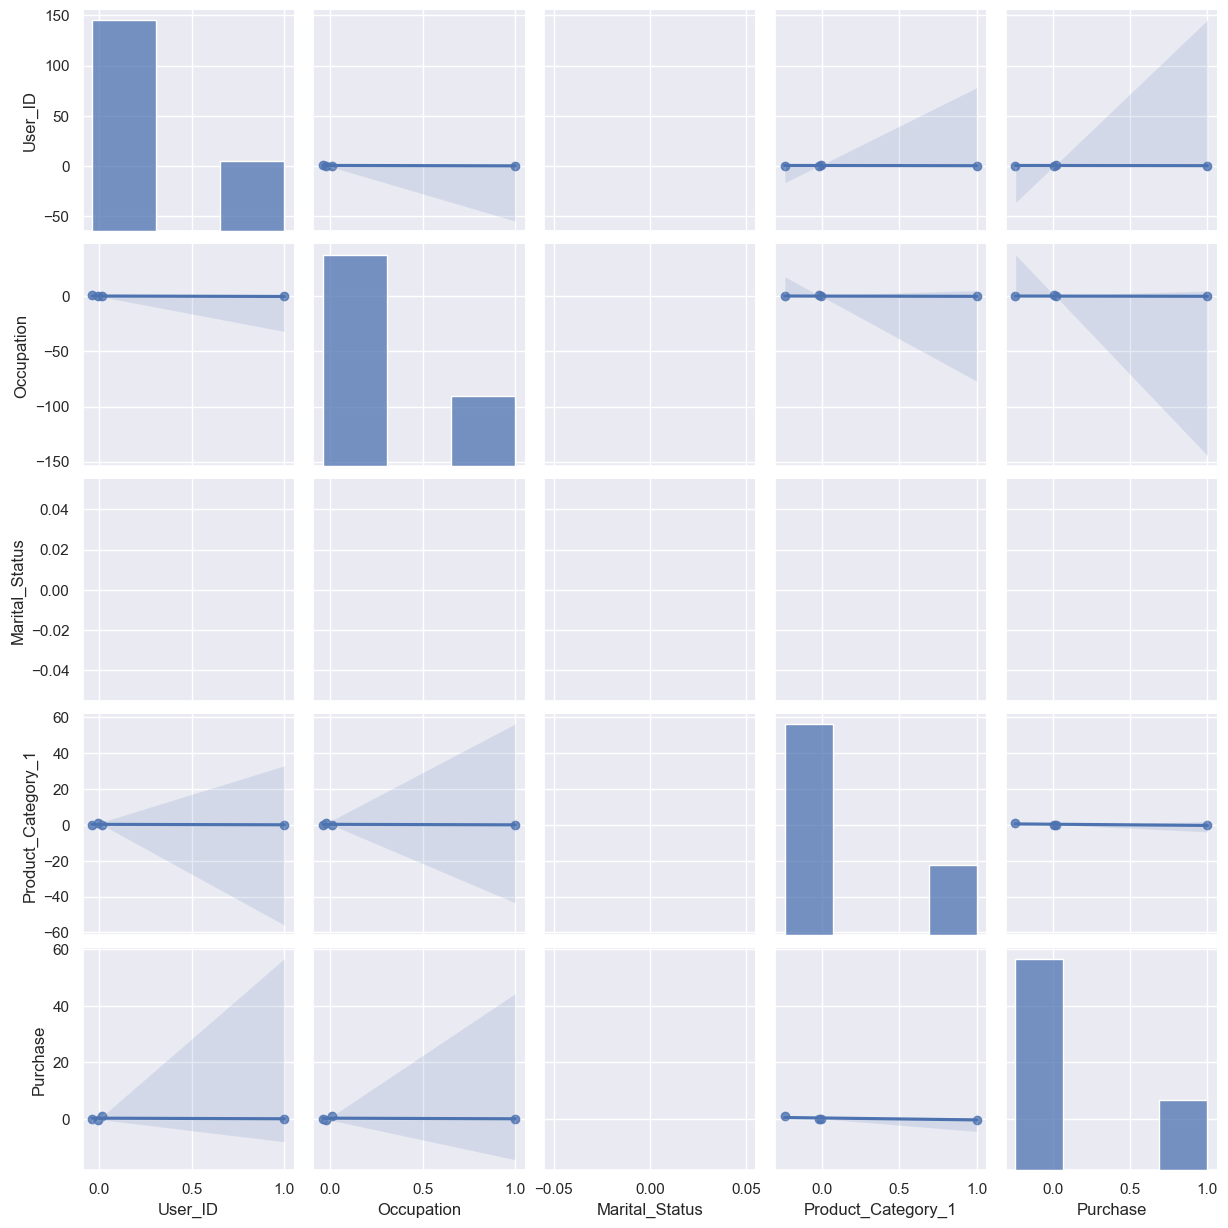

In [65]:
sns.pairplot(df_pr.corr(),kind="reg")

<AxesSubplot:>

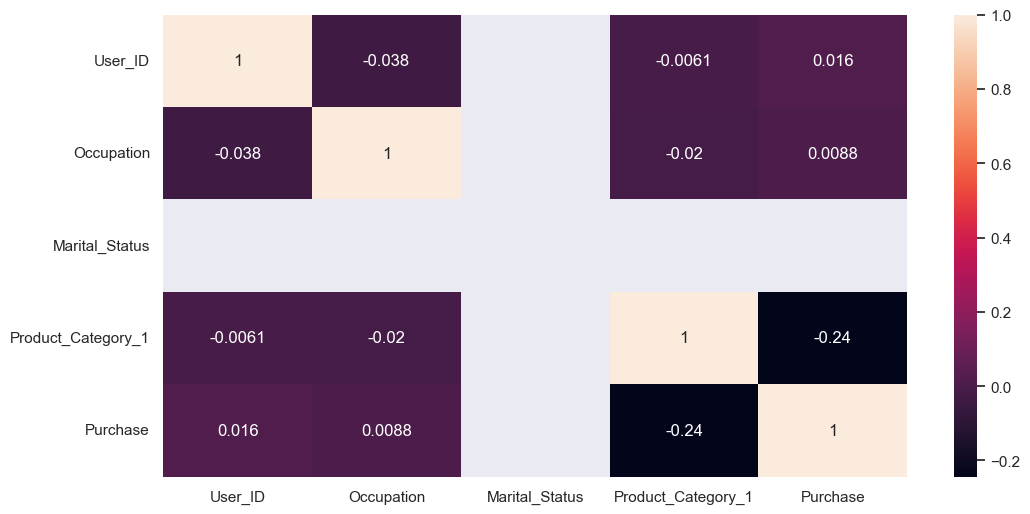

In [66]:
sns.heatmap(df_pr.corr(),annot=True)

In [67]:
df.query('Age=="0-17" and Marital_Status==0')["Purchase"].sort_values(ascending=False).head(5)

388010    23955
126614    23953
170551    23949
170541    23936
443363    23911
Name: Purchase, dtype: int64

In [68]:
df.query('Age=="0-17" and Marital_Status==0').groupby("User_ID").sum()["Purchase"].sort_values(ascending=False)

User_ID
1001088    5628295
1001425    3761988
1001926    3653257
1005074    3343547
1005555    2499271
            ...   
1004549      88795
1005411      88125
1001045      85421
1004926      81535
1004056      75906
Name: Purchase, Length: 218, dtype: int64

In [69]:
df[df["User_ID"]==1001088]["Purchase"].sum()

5628295

## CONCLUSION AND INSIGHTS

1) Male to Female Ratio is approximately 3:1
2) Males are spending approx 3/4 of the total amount 
3) Average Amount spent is same for both Males and Females which means Females are buying more expensive products
4) People from age group 26-35 are buying the most number of products
5) Average amount spent is approximately same for all the age groups
6) People Living in City B are buying and spending the most in the sale
7) Average price spent is More for City C
8) Ratio of unmaried to maried is 59:41
9) People living in the city since an year are spending 34% of the total amount
10) Top 3 hot selling products from category 1 are 1,5,8 and are also the products on which people are spending the most
11) Most products purhased are in order M_0>M_1>F_0>F_1